# KNECTO: Data Exploration
Author: Jun Kim

The purpose of this notebook is to explore the KNECTO dataset. This dataset comprises of readings from a single boat on a single trip.




## Setup and Cleaning Data

First we will be install the necessary modules

In [64]:
pip install pandas matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


Let us print out the csv file and observe the data. 

In [65]:
import pandas as pd

df = pd.read_csv("dataset.csv") 
print(df)

       UTC time  Satellites  Speed (mph)  Heading (Degrees)        Latitude  \
0       53018.7          12         5.68              138.6  26°51.212298 N   
1       53018.8          12         5.97              138.9  26°51.212190 N   
2       53018.9          12         5.78              138.5  26°51.212088 N   
3       53019.0          12         5.80              138.0  26°51.211986 N   
4       53019.1          12         5.85              138.5  26°51.211878 N   
...         ...         ...          ...                ...             ...   
18260   54844.7          12        48.41              241.1  26°42.459828 N   
18261   54844.8          12        48.78              241.2  26°42.459264 N   
18262   54844.9          12        48.72              241.3  26°42.458700 N   
18263   54845.0          12        49.03              241.2  26°42.458118 N   
18264   54845.1          12        48.72              241.1  26°42.457542 N   

            Longitude  BrakeTrigger  Dgps  Wav file

We observe that the column *Day* seems to be full of NaN values. Let us drop that column.

In [66]:
df = df.drop(['Day'], axis=1)

We observe that there seems to be a lot of columns where the data seems to be a constant. Let us verify this for the columns:
- Satellites
- BrakeTrigger
- Dgps
- Wav file
- Dual antenna
- Radius of turn (m)

In [67]:
columns = ["Satellites", "BrakeTrigger", "Dgps", "Wav file", "Dual antenna", "Radius of turn (m)"]

def printData(columns):
    for c in columns:
        col = df[[c]]
        col.fillna(0)
        print("%s\t\t %f\t\t %f\t\t %f" % (c, col.max(), col.min(), col.mean()))
print("Name\t\t Max\t\t Min\t\t Mean")
printData(columns)

Name		 Max		 Min		 Mean
Satellites		 12.000000		 11.000000		 11.999562
BrakeTrigger		 0.000000		 0.000000		 0.000000
Dgps		 1.000000		 1.000000		 1.000000
Wav file		 0.000000		 0.000000		 0.000000
Dual antenna		 0.000000		 0.000000		 0.000000
Radius of turn (m)		 0.000000		 0.000000		 0.000000


Albeit poor formatting, we observe that Satellites does change in value whereas the others do not change in value at all. We will drop these:

In [68]:
df = df.drop(['BrakeTrigger', 'Dgps', 'Wav file', 'Dual antenna', 'Radius of turn (m)'], axis=1)

While there are a lot of NaN values scattered throughout the data, we will handle them on a case by case basis as they may be significant (i.e. NaN value for when sensor fails).

We are now ready to do some exploration.

## Relationship between Revs, Temp, and Speed

Logically speaking, these are closely related to each other. Let us visualize them and see their relationship.

We will first collect the columns we want.

In [73]:
df2 = df[['Revs (RPM)', 'Temp (°F)', 'UTC time', 'Speed (mph)']].copy()
df2 = df2.dropna()

Now we will plot the Revs as a function of time:

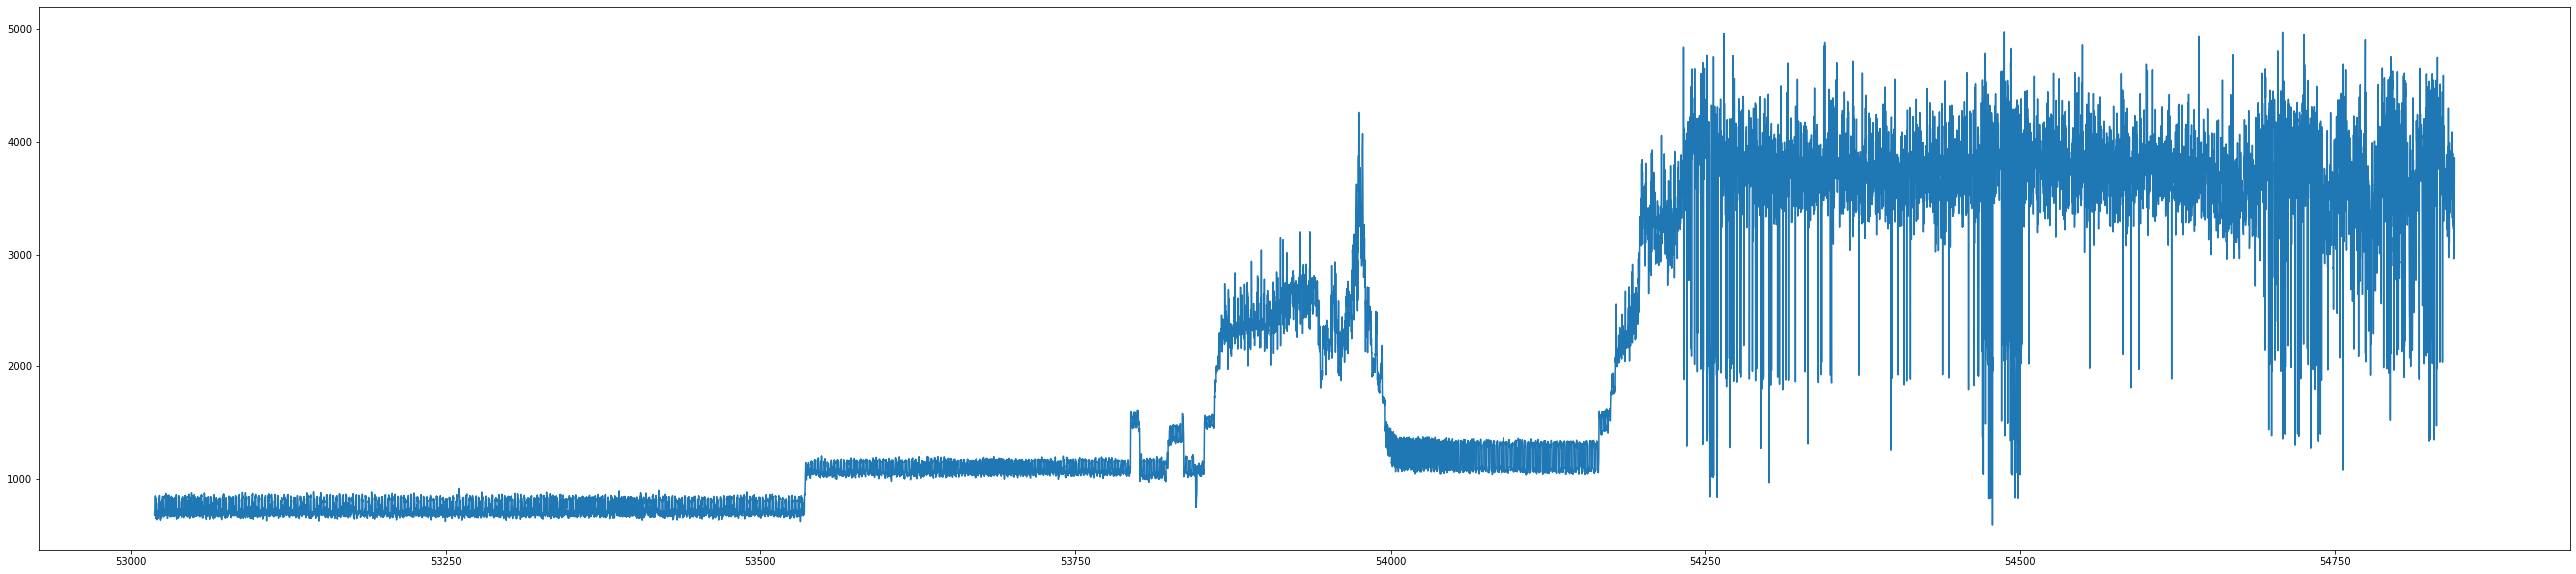

In [74]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(100, 10))
plot = figure.add_subplot(121)
plot.plot(df2["UTC time"], df2["Revs (RPM)"])
plt.show()

We notice that towards the end the graph is very erradic. This makes sense as the boat may be coasting along the waters with the momentum it generated and will only turn on the accelerator when the boat is slowing down too much.

Now we will move onto plotting the temperature:

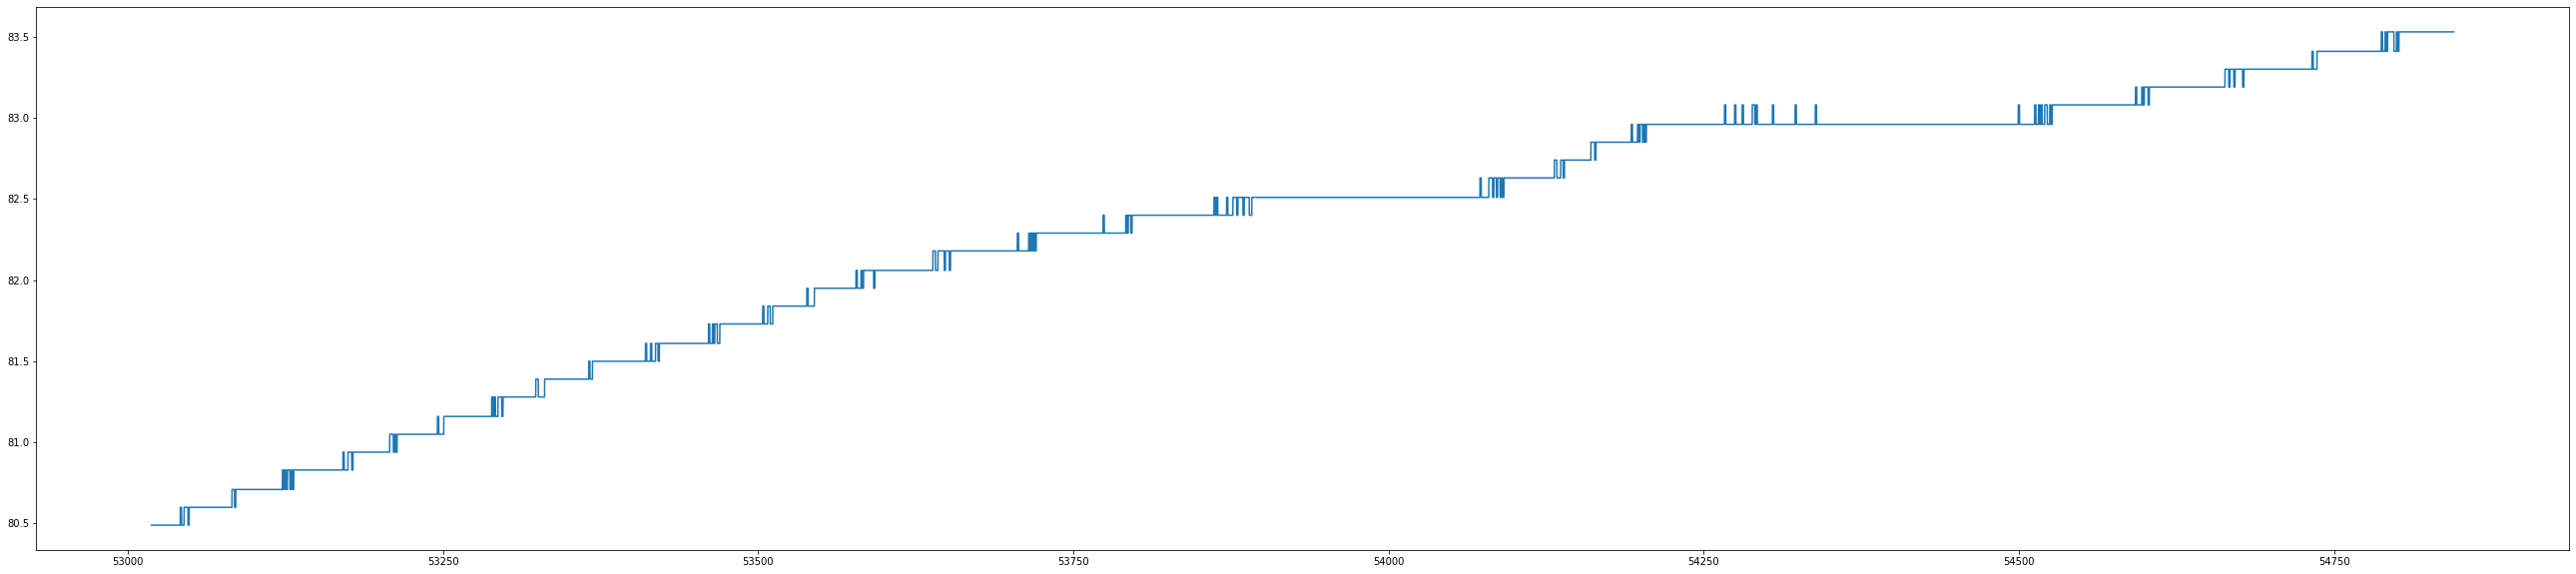

In [75]:
figure = plt.figure(figsize=(100, 10))
plot = figure.add_subplot(121)
plot.plot(df2["UTC time"], df2["Temp (°F)"])
plt.show()

There is something interesting about the temperature readings: it seems to be like a step function. Temperature is a continuous type of data. In addition, there seems to be no spike in termpature in correlation with the spike in Rev a little past the halfway point. 

Now we will observe the speed of our boat:

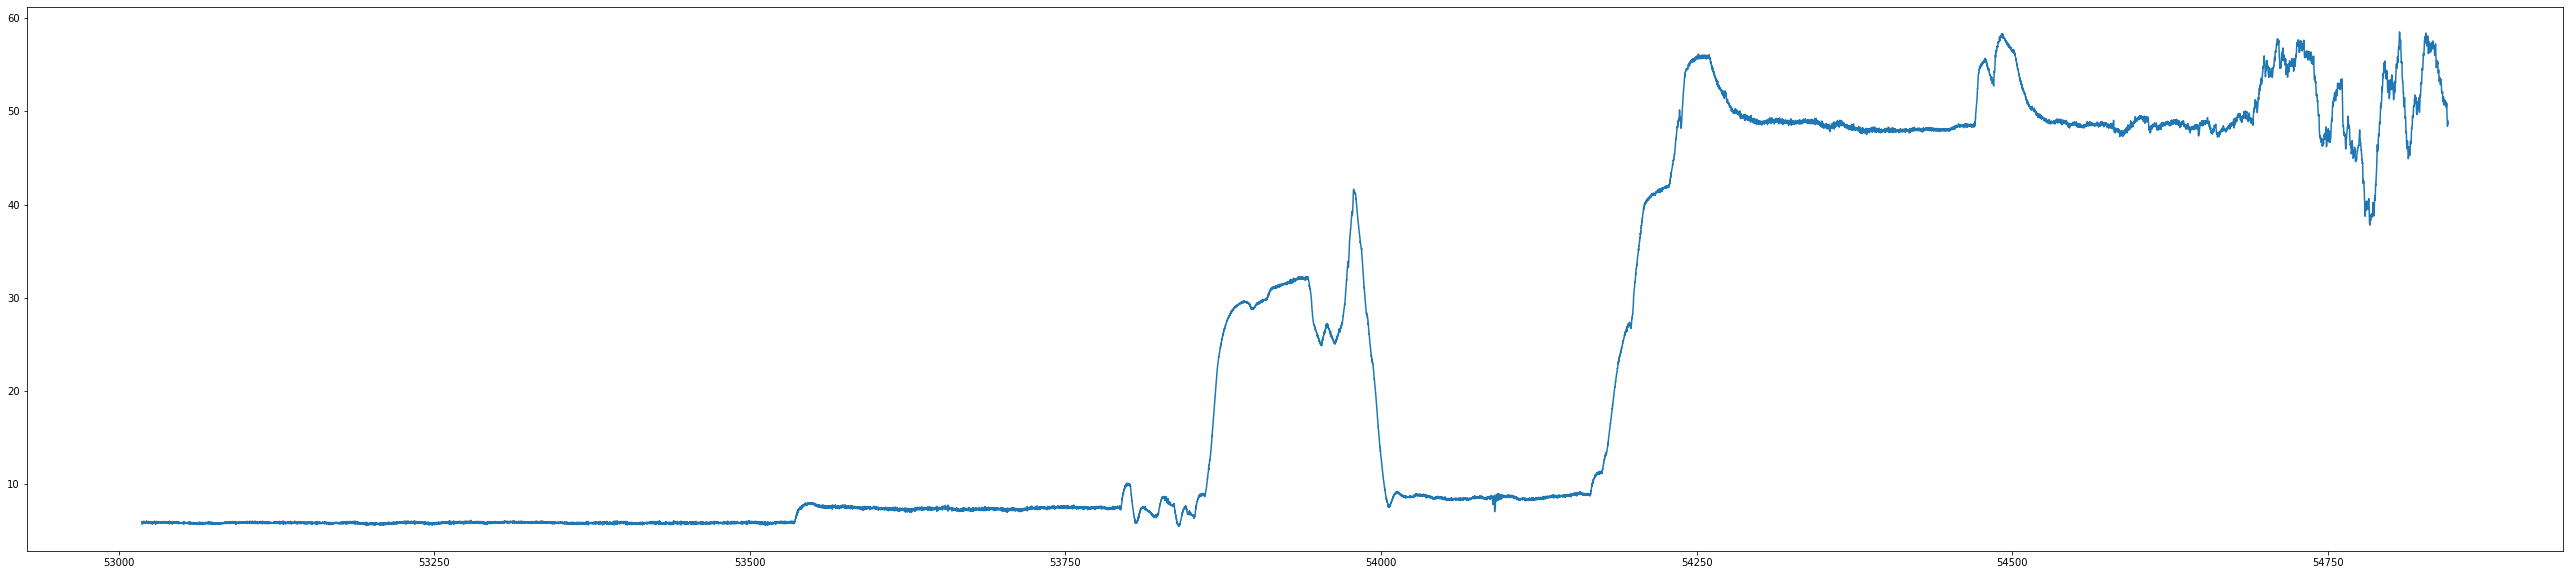

In [76]:
figure = plt.figure(figsize=(100, 10))
plot = figure.add_subplot(121)
plot.plot(df2["UTC time"], df2["Speed (mph)"])
plt.show()

As we expected, we find that that the Rev is heavily close to the speed of the boat. The idea that the rev was erradic towards the end because of the boat coasting at high speeds is supported by this graph. 

## Satellite Number?
When we were looking at the columns that seemed to only contain a constant, we observed that Satellite was not one of those columns. In fact, the column shows that the value of this column is almost always 12 but dips down the 11 at some point. Could we figure out why?

Let us separate the data between `Satellite=11` and `Satellie=12`

In [77]:
df11 = df.loc[df['Satellites'] == 11]
df12 = df.loc[df['Satellites'] == 12]
print(len(df11))

8


We find that there are only 8 instances where Satellites is 11. We will now try to find a relationship between the Satellites data with another column. Let us visualize it as a function of time:

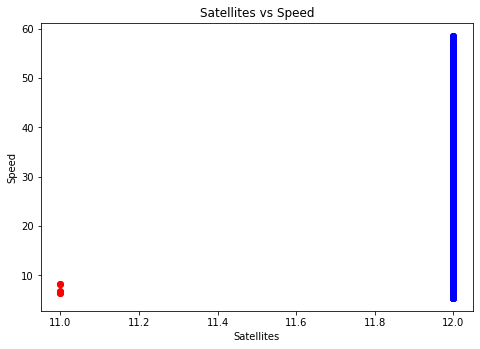

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import math

sat11 = df11[["Speed (mph)"]]
sat12 = df12[["Speed (mph)"]]
x11 = [[11]*len(sat11)]
x12 = [[12]*len(sat12)]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

ax.scatter(x11, sat11, color='r')
ax.scatter(x12, sat12, color='b')
ax.set_xlabel('Satellites')
ax.set_ylabel('Speed')
ax.set_title('Satellites vs Speed')
plt.show()

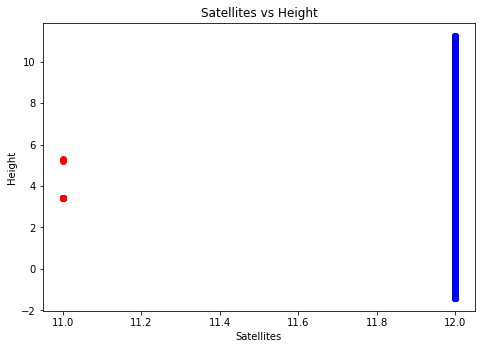

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import math

sat11 = df11[["Height (m)"]]
sat12 = df12[["Height (m)"]]
x11 = [[11]*len(sat11)]
x12 = [[12]*len(sat12)]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

ax.scatter(x11, sat11, color='r')
ax.scatter(x12, sat12, color='b')
ax.set_xlabel('Satellites')
ax.set_ylabel('Height')
ax.set_title('Satellites vs Height')
plt.show()

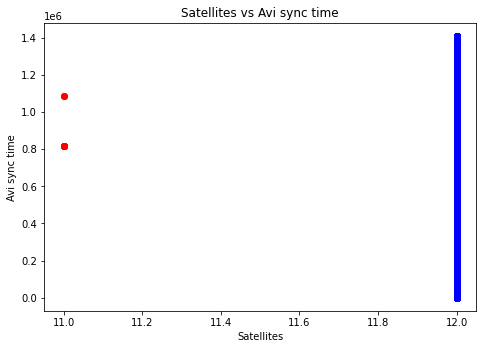

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import math

sat11 = df11[["Avi sync time"]]
sat12 = df12[["Avi sync time"]]
x11 = [[11]*len(sat11)]
x12 = [[12]*len(sat12)]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

ax.scatter(x11, sat11, color='r')
ax.scatter(x12, sat12, color='b')
ax.set_xlabel('Satellites')
ax.set_ylabel('Avi sync time')
ax.set_title('Satellites vs Avi sync time')
plt.show()

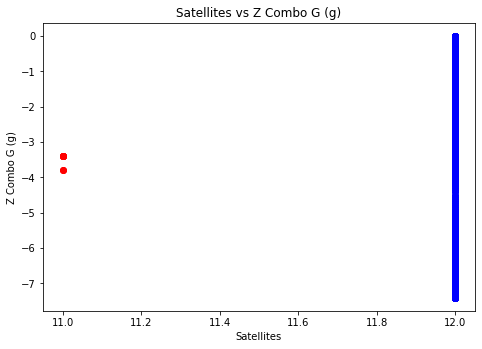

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import math

sat11 = df11[[" Z Combo G (g)"]]
sat12 = df12[[" Z Combo G (g)"]]
x11 = [[11]*len(sat11)]
x12 = [[12]*len(sat12)]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

ax.scatter(x11, sat11, color='r')
ax.scatter(x12, sat12, color='b')
ax.set_xlabel('Satellites')
ax.set_ylabel('Z Combo G (g)')
ax.set_title('Satellites vs Z Combo G (g)')
plt.show()

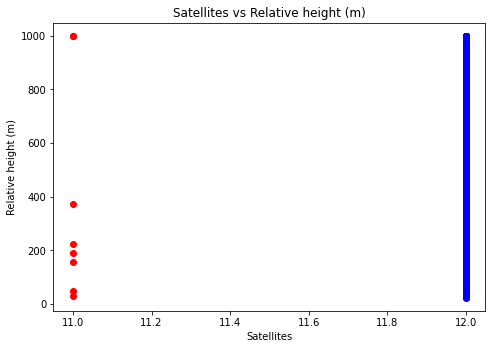

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import math
sat11 = df11[["Relative height (m)"]]
sat12 = df12[["Relative height (m)"]]
x11 = [[11]*len(sat11)]
x12 = [[12]*len(sat12)]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

ax.scatter(x11, sat11, color='r')
ax.scatter(x12, sat12, color='b')
ax.set_xlabel('Satellites')
ax.set_ylabel('Relative height (m)')
ax.set_title('Satellites vs Relative height (m)')
plt.show()

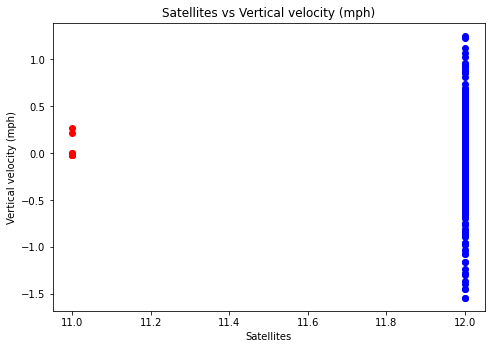

In [83]:
import matplotlib.pyplot as plt
import numpy as np
import math

sat11 = df11[["Vertical velocity (mph)"]]
sat12 = df12[["Vertical velocity (mph)"]]
x11 = [[11]*len(sat11)]
x12 = [[12]*len(sat12)]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

ax.scatter(x11, sat11, color='r')
ax.scatter(x12, sat12, color='b')
ax.set_xlabel('Satellites')
ax.set_ylabel('Vertical velocity (mph)')
ax.set_title('Satellites vs Vertical velocity (mph)')
plt.show()

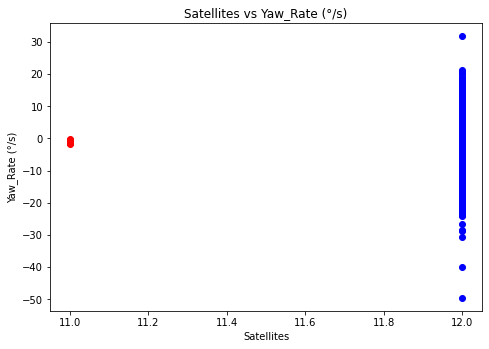

In [84]:
import matplotlib.pyplot as plt
import numpy as np
import math
sat11 = df11[["Yaw_Rate (°/s)"]]
sat12 = df12[["Yaw_Rate (°/s)"]]
x11 = [[11]*len(sat11)]
x12 = [[12]*len(sat12)]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

ax.scatter(x11, sat11, color='r')
ax.scatter(x12, sat12, color='b')
ax.set_xlabel('Satellites')
ax.set_ylabel('Yaw_Rate (°/s)')
ax.set_title('Satellites vs Yaw_Rate (°/s)')
plt.show()

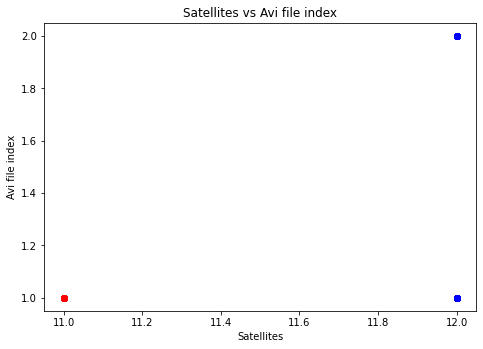

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import math
sat11 = df11[["Avi file index"]]
sat12 = df12[["Avi file index"]]
x11 = [[11]*len(sat11)]
x12 = [[12]*len(sat12)]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

ax.scatter(x11, sat11, color='r')
ax.scatter(x12, sat12, color='b')
ax.set_xlabel('Satellites')
ax.set_ylabel('Avi file index')
ax.set_title('Satellites vs Avi file index')
plt.show()

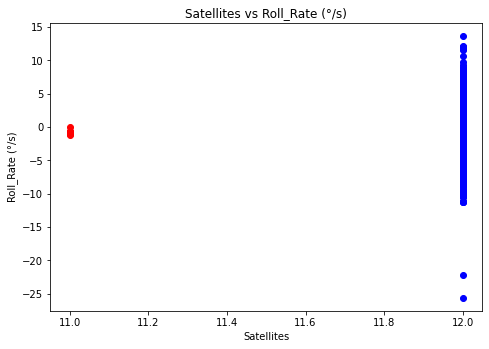

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import math

sat11 = df11[["Roll_Rate (°/s)"]]
sat12 = df12[["Roll_Rate (°/s)"]]
x11 = [[11]*len(sat11)]
x12 = [[12]*len(sat12)]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

ax.scatter(x11, sat11, color='r')
ax.scatter(x12, sat12, color='b')
ax.set_xlabel('Satellites')
ax.set_ylabel('Roll_Rate (°/s)')
ax.set_title('Satellites vs Roll_Rate (°/s)')
plt.show()

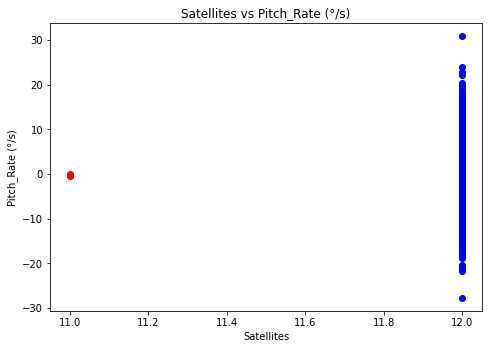

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import math
\
sat11 = df11[["Pitch_Rate (°/s)"]]
sat12 = df12[["Pitch_Rate (°/s)"]]
x11 = [[11]*len(sat11)]
x12 = [[12]*len(sat12)]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

ax.scatter(x11, sat11, color='r')
ax.scatter(x12, sat12, color='b')
ax.set_xlabel('Satellites')
ax.set_ylabel('Pitch_Rate (°/s)')
ax.set_title('Satellites vs Pitch_Rate (°/s)')
plt.show()

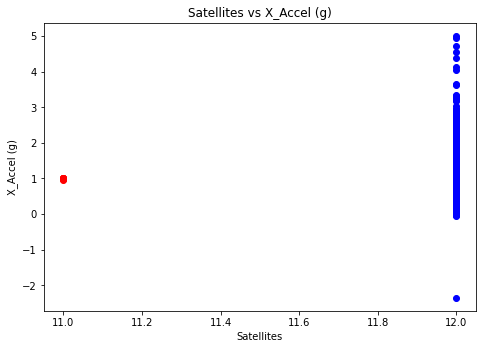

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import math

sat11 = df11[["X_Accel (g)"]]
sat12 = df12[["X_Accel (g)"]]
x11 = [[11]*len(sat11)]
x12 = [[12]*len(sat12)]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])

ax.scatter(x11, sat11, color='r')
ax.scatter(x12, sat12, color='b')
ax.set_xlabel('Satellites')
ax.set_ylabel('X_Accel (g)')
ax.set_title('Satellites vs X_Accel (g)')
plt.show()

We have plotted some data and found that there currently is no decisive set of data that causes the Satellite value to drop to 11. While many plots either show there is no correlation (i.e. Relative Height) or that there are two clusters (since there are two different instances when this happened), there is some data that seem to only exhibit one cluster. These are:
- y_Accel 
- Roll_Rate 
- Pitch_Rate 
- X_Accel
- Yaw_Rate
- Avi file index

## Fun with Latitude and Longitude
Let us explore the longitude and latitude data and observe what they can tell us.

Before we do, we will first convert the data (which is in DMS) into decimal.

In [92]:
df2 = df.copy()
df2 = df2.fillna(0)

#df2 = df2.dropna()
dfInfo = dfInfo.dropna()
def processLongLat(data):
    s = data
    s = s.split("°")
    deg = int(s[0])
    s = s[1].split()
    sign = s[1]
    mic_dec = float(s[0])

    if(sign == "S" or sign == "W"):
        sign = -1
    else:
        sign = 1
    return (deg + mic_dec/60)*sign

df2['Latitude'] = df2['Latitude'].apply(processLongLat)
df2['Longitude'] = df2['Longitude'].apply(processLongLat)

       UTC time  Satellites  Speed (mph)  Heading (Degrees)        Latitude  \
0       53018.7          12         5.68              138.6  26°51.212298 N   
1       53018.8          12         5.97              138.9  26°51.212190 N   
2       53018.9          12         5.78              138.5  26°51.212088 N   
3       53019.0          12         5.80              138.0  26°51.211986 N   
4       53019.1          12         5.85              138.5  26°51.211878 N   
...         ...         ...          ...                ...             ...   
18260   54844.7          12        48.41              241.1  26°42.459828 N   
18261   54844.8          12        48.78              241.2  26°42.459264 N   
18262   54844.9          12        48.72              241.3  26°42.458700 N   
18263   54845.0          12        49.03              241.2  26°42.458118 N   
18264   54845.1          12        48.72              241.1  26°42.457542 N   

            Longitude  Height (m)  Vertical velocit

Let us estimate the speed using the Latitude and Longitude coordinates and compare it to the actual speed

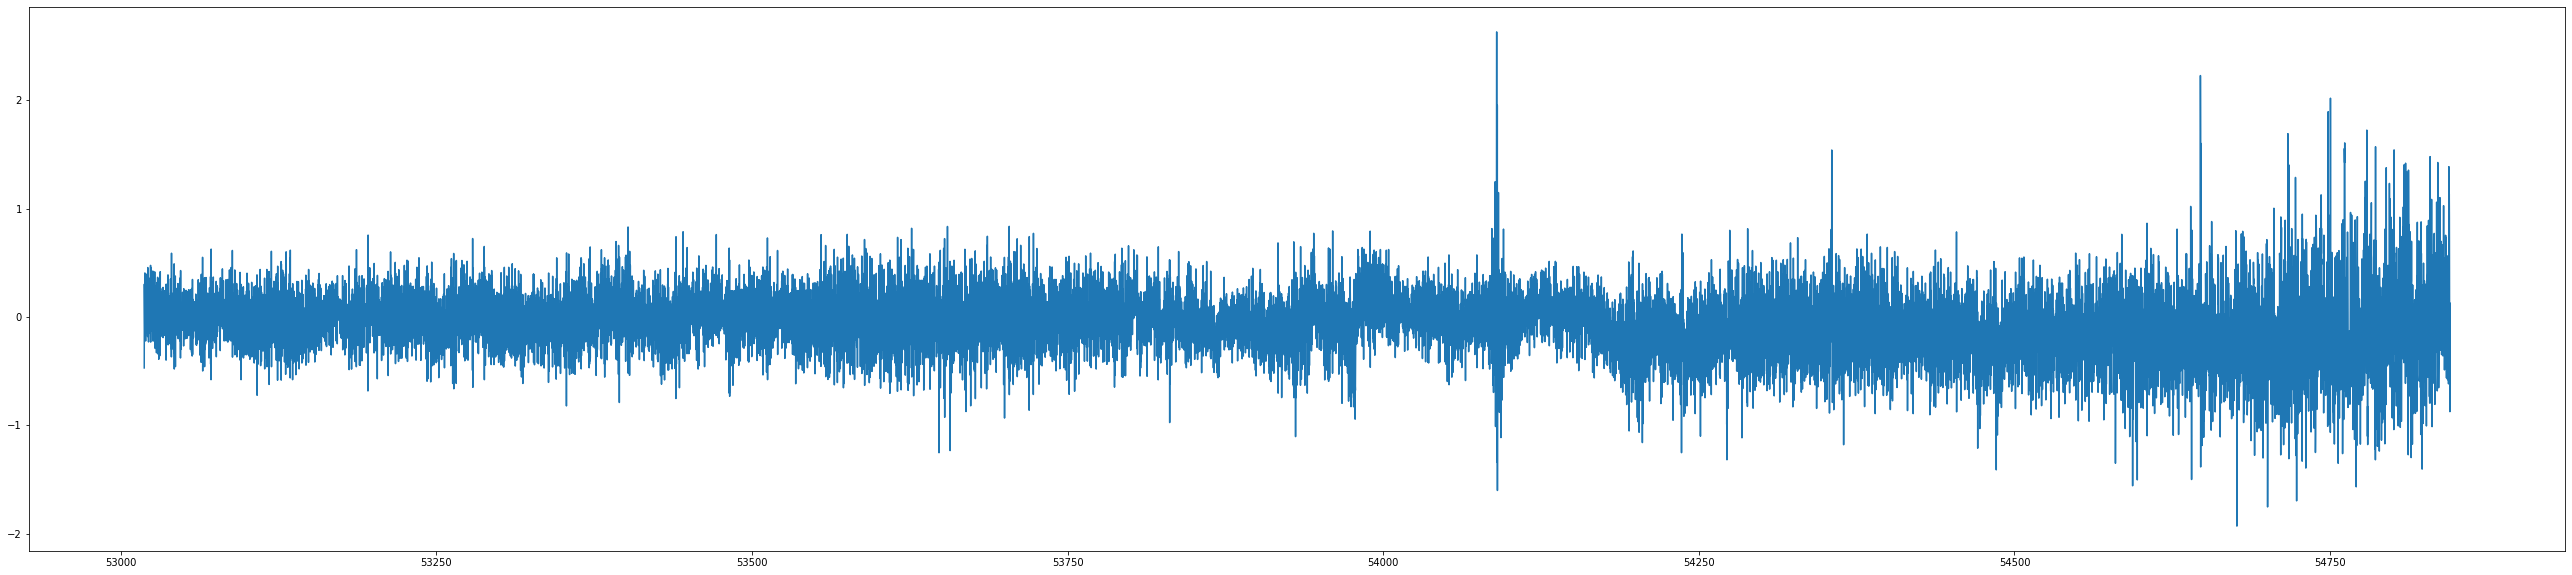

In [90]:
import numpy as np

def getDistance(lat1, lon1, lat2, lon2): #in miles
    earthRadius = 6371000
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    d = earthRadius * c
    
    metersToMiles = 0.000621371
    
    return d*metersToMiles

lat = np.array(df2[["Latitude"]]).flatten()
long = np.array(df2[["Longitude"]]).flatten()
time = np.array(df2[["UTC time"]]).flatten()[0:len(lat)-1]
speed = np.array(df2[["Speed (mph)"]]).flatten()[0:len(lat)-1]
speedsCalc = []
for i in range(0, len(lat)-1):
    estimatedSpeed = getDistance(lat[i], long[i], lat[i+1], long[i+1])*60*60*10
    speedsCalc.append(estimatedSpeed)
speedsCalc = np.array(speedsCalc)
diffSpeed = speed-speedsCalc
figure = plt.figure(figsize=(100, 10))
plot = figure.add_subplot(121)
plot.plot(time, diffSpeed)
plt.show()

As we can see, we can say that the speed is fairly accurate.

We now want to try and see the relationship between our positioning and our accelerations. The color represents the x-acceleration and the y-accerlation is represented by the size of the datapoint. 

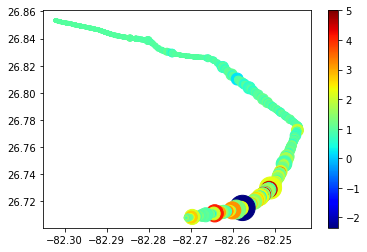

In [111]:
import matplotlib.pyplot as plt
sc = plt.scatter(df2['Longitude'], df2['Latitude'], s=df2['Y_Accel (g)']*250, c=df2['X_Accel (g)'], cmap=plt.get_cmap("jet"))

plt.colorbar(sc)
plt.show()

We see that towards the end we have a lot more acceleration in both dimensions. 